# Cash - Hotstock 분산투자 최적화 문제

### 0. 문제상황 및 조건
<hr>

#### 0.1. 문제상황
매년 Cash의 수익률은 +0% / Hot stock은 50% 확률로 수익률 +100%, 50% 확률로 수익률 -50%이다.
Cash와 Hot stock을 어떤 비율로 분산 투자해야 연 기대 수익을 최대화할 수 있는가?
1. 연 기대수익률을 최대화하는 Cash, Hot stock 투자 비율을 구하고, Cash 50%, Hot stock 50%인지 확인
2. 그때의 기대수익률을 구하고 8%인지 확인(8%는 산술평균을 이용한 직관적 수익률)

#### 0.2. 변수를 이용한 일반화
- $A_0 $ : 초기 투자 원금 ( $ A_0 = \text{const.}$ )
- $A_i$ : $i$년 투자 시 총 자산
- $r_i$ : $i$년 째의 투자 수익률 ($\, -1.0 \leq r_i \leq +1.0 \,$)
- $R_i \equiv 1 + r_i$ : 수익률 표기 편의를 위해 정의한 변수
- $\bar{r}$ : 임의의 n년 간의 평균 수익률 (위와 유사한 표기법으로 $\, \bar{R}\equiv 1 + \bar{r} \,$ )
- $r$ : Hot stock의 수익률
- $w$ : Hot stock에 투자한 비율 ( $\, 0 \leq w \leq 1 \,$ )

### 1. 일반화된 투자 상황에서의 자산, 수익률 기술
<hr>

##### 1.1. 투자 상황 기술
일반화된 투자 상황부터 시작해보자. 원금 $A_0$을 가진 사람이 임의의 자산에 매년 투자를 하는 상황을 식으로 기술하면 다음과 같다.

(0년째 자산) $A_0 \rightarrow $ (1년째 자산) $A_1 = A_0 R_1 \rightarrow$ (2년째 자산) $A_2 = A_1 R_2 = A_0 R_1 R_2 \rightarrow \cdots $ (n년째 자산) $ A_n = A_0 R_0 \cdots R_n = A_0 \Pi_{i=1}^n R_i \rightarrow \cdots$ 

(이하 표기 간략화를 위해 $ \Pi_{i=1}^n$을 $\Pi$로 적는다.)

##### 1.2. 수익률 기술

해마다 수익률이 곱해지는 상황, 이런 상황에서 평균 수익률($\bar{r}$)은 **기하평균**을 도입하여 구할 수 있다(혹은 기하평균을 도입하여 구하는 것이 합리적이다).

$$ 1 + \bar{r} = \sqrt[n]{(1+r_0)\cdots(1+r_n)} $$

$$ \bar{R} = \sqrt[n]{\Pi R_i} $$

따라서 평균 수익률에 따른 기대 자산 $A$는 다음과 같다.

$$ A = A_0 \bar{R} = A_0 \sqrt[n]{\Pi R_i} $$

### 2. 확률 변수(random variable) 개념 도입
<hr>

만약 우리에게 주어진 수익률 $r_i$들이 모두 상수였다면, 즉 매년 투자하는 종목의 수익률이 상수로 고정됐다면, 기대 자산 $A$는 위 식에서 모든 수익률 $R_i$값을 대입하여 얻을 수 있다. (해피엔딩!) 하지만 자산은 일반적으로 변동성이 있으며, 즉 **일반적으로 수익률 $r_i$는 상수가 아닌 확률 변수(random variable)이므로** 변동성 요소인 확률변수를 고려하여 기대 자산을 계산해야 한다. 따라서 다음을 구하는 것이 우리의 목표이다.

$$ E(A) $$

즉, $ E(A) = E \left( A_0 \sqrt[n]{\Pi R_i} \right) $을 계산하자.

### 3. Jensen의 부등식(Jensen's inequality) 도입
<hr>

Jensen의 부등식에 따르면, 임의의 convex 함수 $f(x)$에 대해, $f(E(A)) \leq E(f(A)) $가 성립한다. 이에 따름으로 임의의 concave 함수 $f(x)$에 대해, $f(E(A)) \geq E(f(A)) $가 성립한다.

우리의 문제에 Jensen의 부등식을 도입하기 위한 concave 함수로 $f(x) = \ln (x)$를 사용한다. 따라서,

$$ \ln (E(A)) = \ln \left( E \left( A_0 \sqrt[n]{\Pi R_i} \right) \right) \geq E \left( \ln \left( A_0 \sqrt[n]{\Pi R_i} \right) \right) $$

우변 정리시,

$$ E \left( \ln A_0 \left( \sqrt[n]{\Pi R_i} \right) \right) = E \left( \ln A_0 + \frac{1}{n} \ln \left( \Pi R_i \right) \right) =  E \left( \ln A_0 + \frac{\ln R_1 + \cdots + \ln R_n}{n} \right)$$







* $A_0$를 표기 이유<br>
    기대 자산이라는 의미를 보다 명시적으로 표현하기 위해, 자산이라는 단위를 명시적으로 맞추기 위해, 그리고 주어진 식으로 코드를 작성하는 등 차후 논의의 확장성을 살려두기 위해 $A_0$를 계속 표기 (하지만 가독성을 위해 이하의 식에서 $A_0 = 1$, 즉 $\ln A_0 = 0$ 으로 두어도 상관없음)
    이 표현을 사용한 Jensen의 부등식은 다음과 같음.

$$ \ln (E(A)) \geq E \left( \ln A_0 + \frac{\ln R_1 + \cdots + \ln R_n}{n} \right)$$

### 4. Jensen의 부등식의 등호 성립
<hr>

(위의 부등식 finite form인) Jensen의 부등식에서 등호가 성립하는 상황은 함수 $f$ 가 linear이거나, 함수 $f(x)$의 argument $x$가 모두 같은 경우이다. 단순한 상황으로 풀어 설명하면, convex 함수 $f(x)$에 대해, $ \frac{f(a)+f(b)}{2} \geq f(\frac{a+b}{2})$에서 $a=b$라서 등호가 성립하는 상황이다.  
문제 상황은 f(x)의 argument가 모두 같은 경우, 즉 $R_1 = \cdots = R_n$에 해당된다.

### 5. 주어진 투자 전략(투자 비율, 수익률)의 문제에의 적용
<hr>

매년 초, Cash와 Hot stock에 일정한 비율로 분산 투자한다. 주식투자 비율을 $w$라고 할 때, 현금 투자 비율은 $1-w$ 이다. Cash의 수익률은 0이고, Hot stock의 수익률은 $r$이다. 이 경우 자산의 변동을 식으로 기술하면 다음과 같다. 단, 매년마다 이전 년도의 자산을 원금으로 삼아 Cash에 $1-w$, Hot stock에 $w$의 비율로 재조정 (포트폴리오 리밸런싱) 투자를 전제한다.

(0년째 자산) $A_0 \rightarrow $ (1년째 자산) $A_1 = (1-w)A_0 + wA_0(1+r) = A_0(1+rw) \rightarrow$ (2년째 자산) $A_2 = A_1 R_2 = A_0(1+rw)(1+rw) \rightarrow \cdots $ (n년째 자산) $ A_n = A_0 (1+rw)^n \rightarrow \cdots$  

따라서

$$ R_i = (1+rw) , \quad i = 1, 2, \cdots $$

$$ R \equiv R_i = (1+rw)$$

투자 전략은 매년 수익률 $r_i$가 동일한 경우이다. 즉 $ R \equiv R_1 = \cdots = R_n$ 이므로 Jensen의 부등식에서 등호가 성립하는 상황이다.

젠센의 부등식을 적용한 식을 등호로 바꾸고 우변 정리시,

$$ \ln (E(A)) = E \left( \ln A_0 + \frac{\ln R_1 + \cdots + \ln R_n}{n} \right) = \ln A_0 + E \left( \frac{n \ln R }{n} \right) = \ln A_0 + E \left(  \ln R \right) $$

### 6. 기대 자산 $E(A)$ 도출
<hr>

$ R = 1+ rw $ 이고, $r$은 random variable인 Hot stock 수익률이다. $r$은 다음과 같으므로,

$$ r = 
\begin{cases}
+1.0 & p=1/2 \\
-0.5 & p=1/2
\end{cases}
$$

이를 대입해 $E(\ln R)$ 을 계산시,

$$ E( \ ln R) = E(\ln (1+rw)) = \frac{1}{2} \ln(1+w) + \frac{1}{2} \ln(1-0.5w) = \ln \left( \sqrt{(1+w)(1-0.5w)} \right)$$

따라서

$$ \ln (E(A)) = \ln \left( A_0 \sqrt{(1+w)(1-0.5w)}  \right)$$

양변 모두 $ \ln $ 함수로 싸여져 있으므로, 최종적으로 $E(A)$는 다음과 같다.

$$ E(A) = A_0\sqrt{(1+w)(1-0.5w)} $$

$E(A)$는 위와 같이 $w$에 대한 함수이므로 w에 대한 함수라는 것을 명시하기 위해 $E(A)$를 $E(A)(w)$라고 표기하자. 

$$ E(A)(w) = A_0\sqrt{(1+w)(1-0.5w)}$$

### 7. $E(A)(w)$ plotting
<hr>

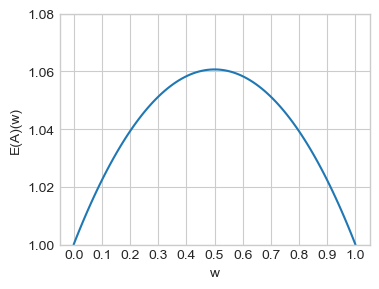

In [52]:
import math
import numpy as np
import matplotlib.pylab as plt

w_domain = np.linspace(0, 1, num=100)
fw = []
for w in w_domain:
    fw.append(math.sqrt((1+w)*(1-0.5*w)))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(4,3))
plt.plot(w_domain, fw)
plt.xlabel('w')
plt.ylabel('E(A)(w)')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylim([0, 1])  
plt.ylim([1, 1.08])  
plt.show()

위 함수 그래프로부터 
- ($w=0$) Cash에 100% 투자 시 기대 수익이 1, 즉 원금으로 유지되고
- ($w=1$) Hot stock에 100% 투자 시 기대 수익이 1, 오르락내리락하지만 기대 수익은 원금으로 유지되는 

두 가지 상황을 구분할 수 있으며, 기대 수익을 최대로 만드는 $w$가 0과 1 중간 즈음이라는 것도 확인할 수 있다.

### 8. 기대 자산을 최대화하는 투자 비율 $w$
<hr>

기대 자산을 최대화하는 극값을 찾기 위해 $w$에 대해 $E(A)(w)$를 미분한다. 

$$\frac{d}{dw} E(A)(w) = A_0 \frac{(0.5-w)}{2\sqrt{(1+w)(1-0.5w)}} $$

$\frac{d}{dw} E(A)(w) = 0 $ 인 $w$는 다음과 같다.

$$ w = 0.5 $$

> ###  기대 자산(자산의 기대값)을 최대화하는 투자 비율은 <u>Cash 50%, Hot stock 50%</u> 이다. 

### 9. 기대 자산이 최대화될 때의 수익률 $r_{max}$
<hr>

$$ E(A)(0.5) = A_0 \sqrt{(1+0.5)(1-(0.5)(0.5))} = A_0 \sqrt{\frac{9}{8}} \simeq 1.06 A_0 = A_0(1+r_{max})$$

따라서 기대 자산이 최대화될 때의 수익률 $r_{max}$는 다음과 같다.

$$ r_{max} = 0.06 $$

> ###  기대 자산(자산의 기대값)을 최대화될 때의 투자 수익률은 <u>6%</u> 이다. (8%가 아니다.)